### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Moving Target Column to the end of the queue

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')
last_column = df.pop('isFraud')
df.insert(10, 'isFraud', last_column)
df.head()

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""vs4WUPL1Per0ki2AyCEKtQ"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>Fraud.csv - Google Drive</title><meta property=""og:title"" content=""Fraud.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/19eBGW8-iT5TfMqqWKhjNYr3bHHVYyuxu/view?usp=sharing&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""vs4WUPL1Per0ki2AyCEKtQ""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v._eaMrpPXxVU.L.X.O/d=0/rs=AO0039tYuUtUSNXrryTMYOa7Gbi3rxOfbw"" nonce=""vs4WUPL1Per0ki2AyCEKtQ""><script nonce=""sO9zaYeMi-Va3IoHm46rFg"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nl""",docs-fe-re:2,docs-fl:1,docs-l1lc:2,"docs-l1lm:""CBF""",...,0.74,0.75,0.76,0.77,1].11,[[null.2,null.212,null.213,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.HiNhIHQnvKY.es5.O/rt=j/m=qabr,q_dnp,qapid,q_dg/exm=qaaw,qadd,qaid,qein,qhaw,qhba,qhbr,qhch,qhga,qhid,qhin/d=1/ed=1/rs=AA2YrTttyORIHcfI5XixXYDlVC1kjt4iSQ]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Copyright The Closure Library Authors.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPDX-License-Identifier: Apache-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Object Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFlaggedFraud  int64  
 10  isFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Looking for unique values in each columns

In [5]:
for feature in df.columns:
    print(f"{feature} has {df[feature].unique()} unique values \n \n {('*')*120} \n")

step has [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

### Checking for the null values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

### Checking Correlation between the variables

<ipython-input-7-332c1a26b6bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coore = df.corr()


<Axes: >

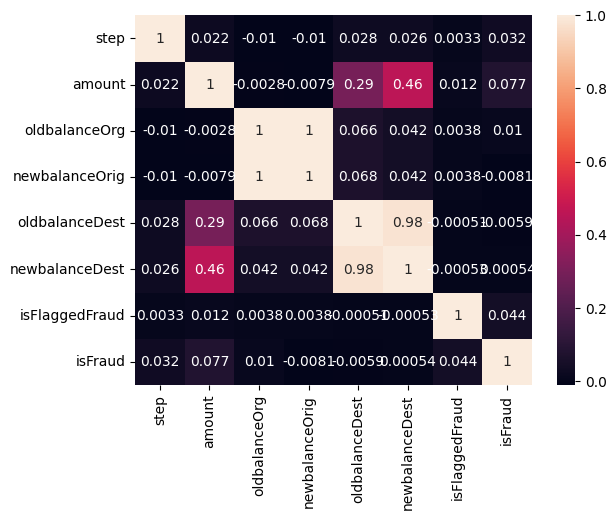

In [7]:
coore = df.corr()
sns.heatmap(coore, annot = True)

### Dropping Columns
- Column newbalanceOrig and oldbalanceorg is found to have the +ve correlation of 1.
- Column newbalanceDest and oldbalanceDest has a high correlation of 0.98
### hence we can drop one of the two columns among them
  Dropping newbalanceorg and newbalanceDest

In [8]:
df.drop(['newbalanceOrig', 'newbalanceDest'], axis = 1, inplace = True)
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')

### Seperating Numerical and Categorical Columns

In [9]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
# numerical_df = df[numerical_features]
# categorical_df = df[categorical_features]

In [10]:
df.value_counts(df['isFraud'])

isFraud
0    6354407
1       8213
dtype: int64

### Dataset is highly unbalanced:
- 0   has 6354407 records
- 1   has   8213 records
- there is a coorelation of 0.77 between amount and isFraud column

<Axes: xlabel='amount', ylabel='isFraud'>

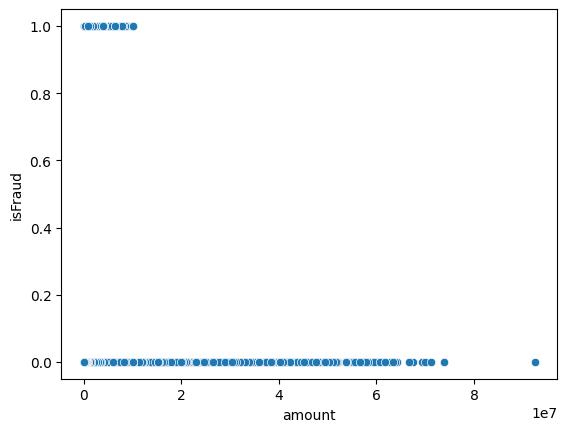

In [13]:
sns.scatterplot(x= 'amount', y = 'isFraud', data = df)

- Most of the values where amount is around 0 is a Fraud Transaction
- All the transactions which are Flagged as fraud are fraud transactions

<Axes: xlabel='isFlaggedFraud', ylabel='isFraud'>

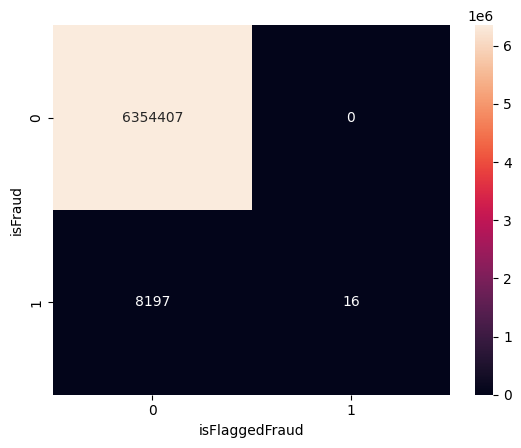

In [14]:
crosstab = pd.crosstab(df['isFraud'], df['isFlaggedFraud'])
sns.heatmap(crosstab, annot = True, fmt='d')

### Downsampling the Dataset to remove the bias

In [23]:
nonFraudT = df[df['isFraud']==0]
FraudT = df[df['isFraud']==1]
nonFraudT = nonFraudT.sample(n = 8213)
print(FraudT.shape, nonFraudT.shape)
df1 = pd.concat([nonFraudT, FraudT], axis = 0)
df1.reset_index(drop=True)
numerical_df = df1[numerical_features]
categorical_df = df1[categorical_features]
df1

(8213, 9) (8213, 9)


,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFlaggedFraud,isFraud
3021775,233,CASH_OUT,190634.76,C959585034,0.00,C2017697935,581469.11,0,0
4584588,328,CASH_OUT,125700.40,C1547984972,0.00,C886942202,301504.60,0,0
6110871,525,CASH_IN,452657.73,C1858356543,3357539.59,C1583730723,3983363.32,0,0
3757941,279,TRANSFER,30742.20,C517125135,11620.00,C2027050948,776117.93,0,0
5332823,374,PAYMENT,20351.61,C1904041682,10229.00,M710651410,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,C776919290,0.00,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,C1881841831,0.00,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,C1365125890,68488.84,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,C2080388513,0.00,0,1


In [13]:
numerical_df

,step,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud,isFraud
5095751,355,88377.22,10767.00,472509.64,0,0
2604851,208,10840.22,39973.00,0.00,0,0
3122765,236,1649.07,0.00,0.00,0,0
5542900,382,1812561.44,0.00,9713801.24,0,0
2457449,203,12325.25,11077.00,0.00,0,0
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0,1
6362616,743,6311409.28,6311409.28,0.00,0,1
6362617,743,6311409.28,6311409.28,68488.84,0,1
6362618,743,850002.52,850002.52,0.00,0,1


### Finding Outliers

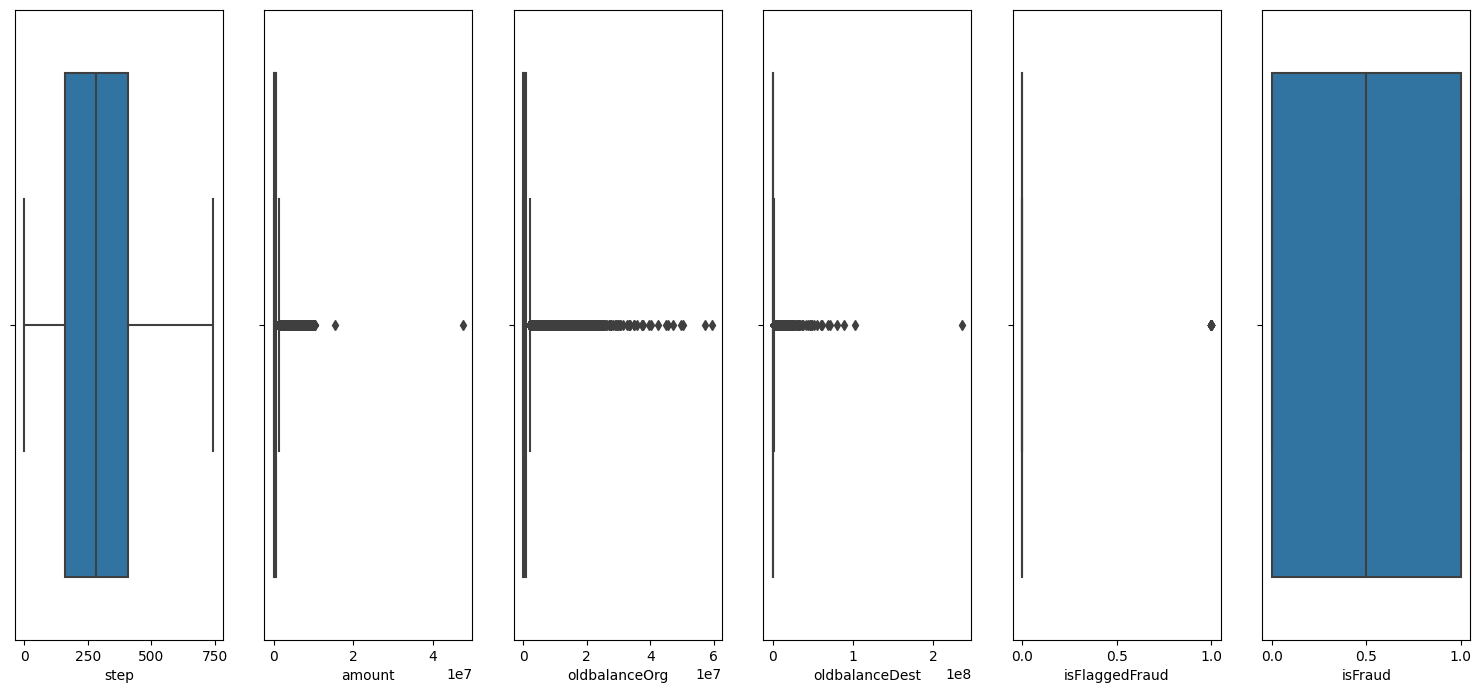

In [24]:
plt.figure(figsize=(22,18))
for i,col in enumerate(numerical_df.columns):
    plt.subplot(2,7,i+1)
    sns.boxplot(x = numerical_df[col])
    plt.xlabel(str(numerical_df.columns[i]))


### Using IQR Method to Remove Outliers and Comparing it with the old data

percentile25 159.0
percentile75 408.0
Upper limit 781.5
Lower limit -214.5


<ipython-input-27-947aa8842d72>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[column])
<ipython-input-27-947aa8842d72>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[column])


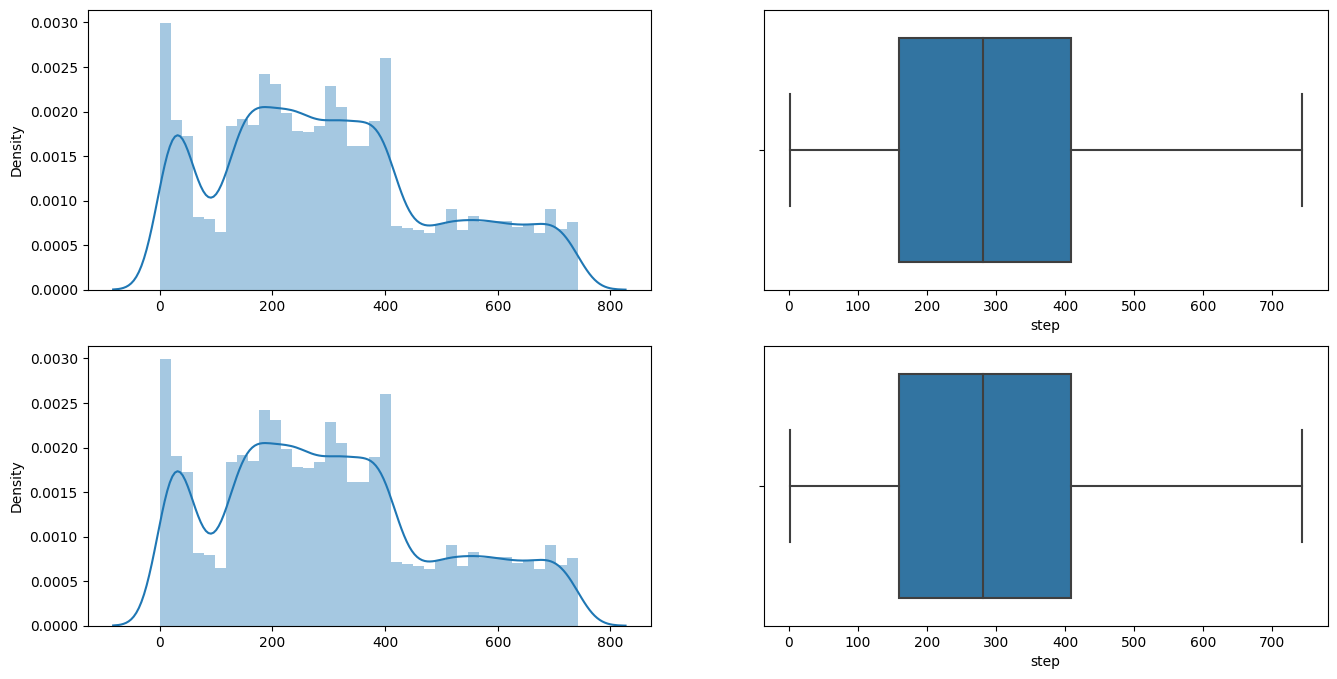

percentile25 37436.78
percentile75 543693.625
Upper limit 1303078.8925
Lower limit -721948.4874999999


<ipython-input-27-947aa8842d72>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[column])
<ipython-input-27-947aa8842d72>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[column])


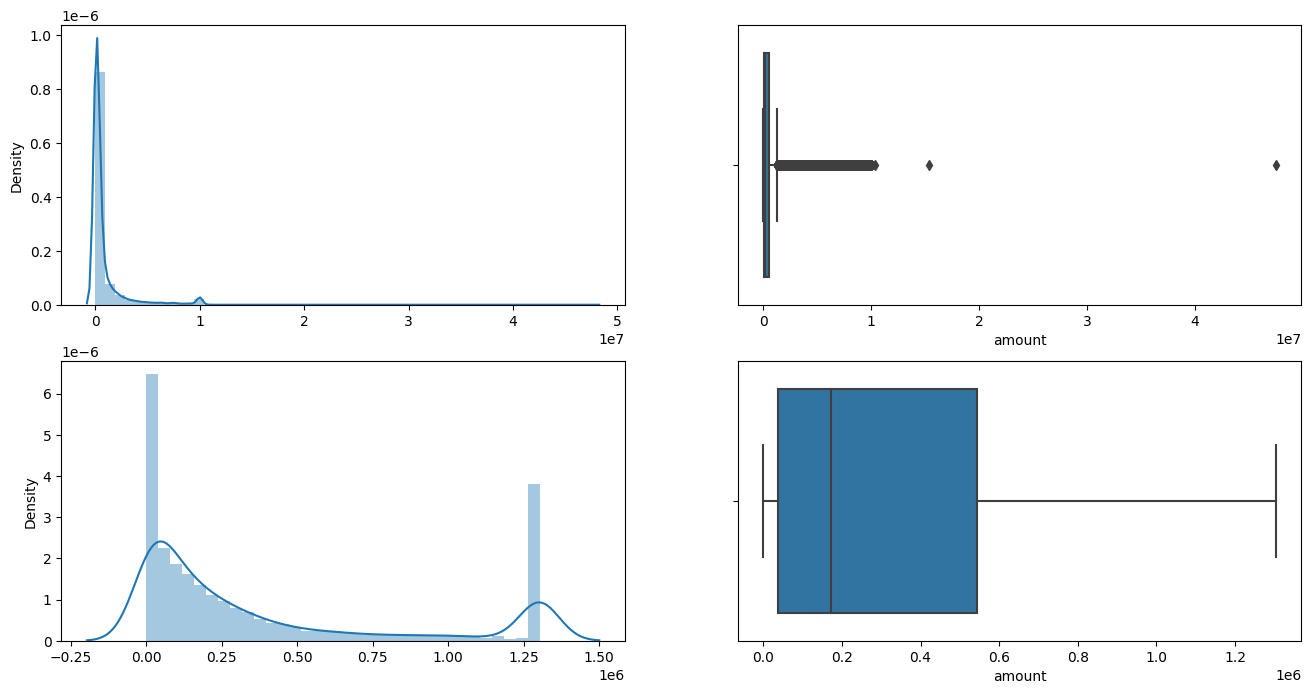

percentile25 10320.5
percentile75 810039.19
Upper limit 2009617.2249999999
Lower limit -1189257.535


<ipython-input-27-947aa8842d72>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[column])
<ipython-input-27-947aa8842d72>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[column])


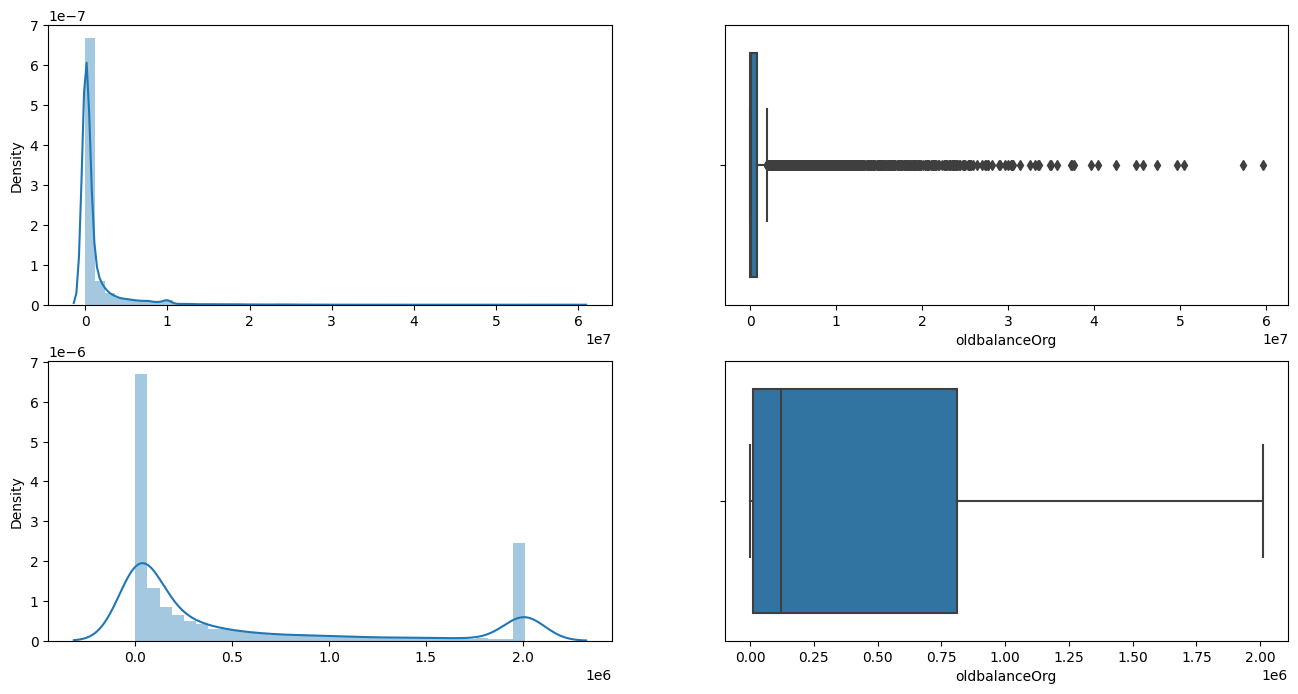

percentile25 0.0
percentile75 519641.395
Upper limit 1299103.4875
Lower limit -779462.0925


<ipython-input-27-947aa8842d72>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[column])
<ipython-input-27-947aa8842d72>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[column])


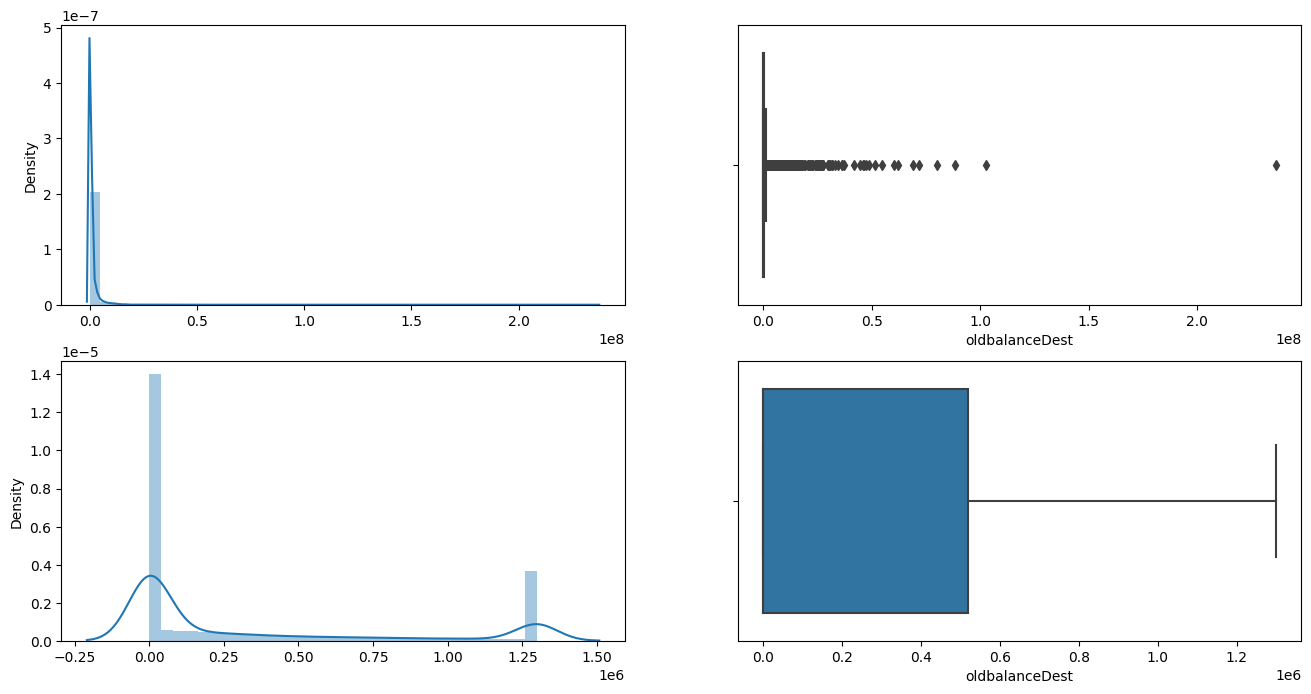

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


<ipython-input-27-947aa8842d72>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[column])
<ipython-input-27-947aa8842d72>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[column])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0

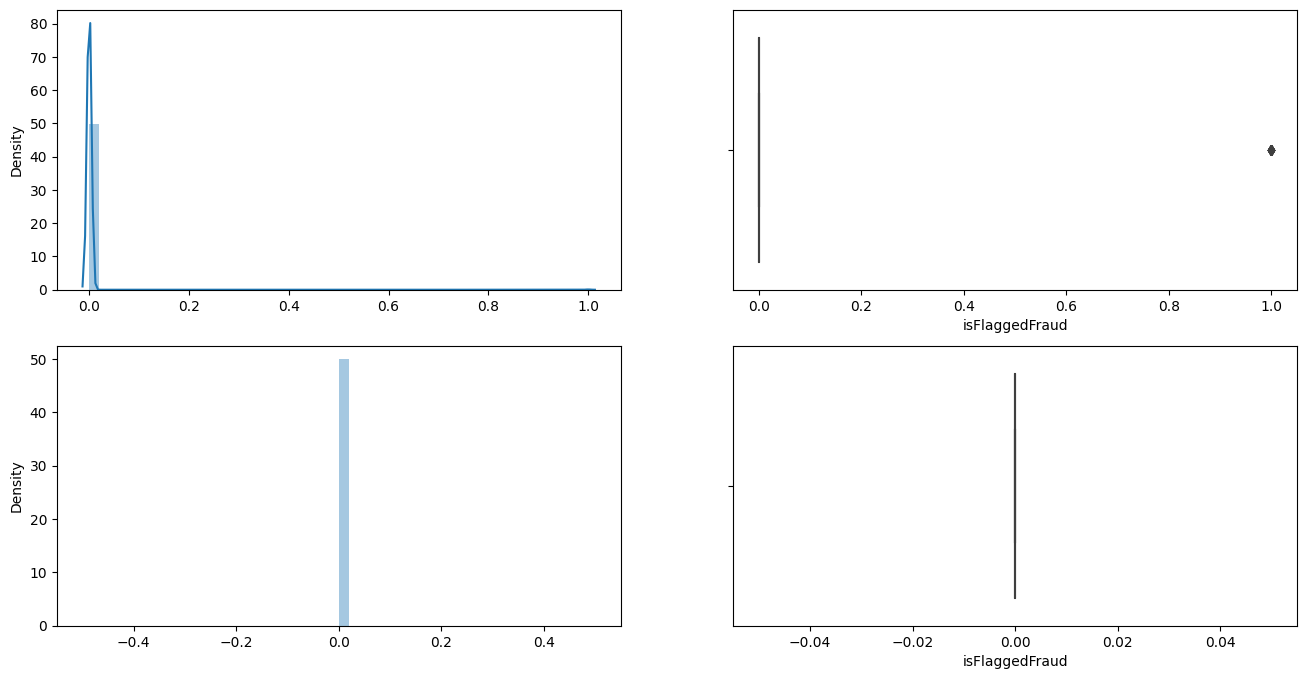

percentile25 0.0
percentile75 1.0
Upper limit 2.5
Lower limit -1.5


<ipython-input-27-947aa8842d72>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[column])
<ipython-input-27-947aa8842d72>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df1[column])


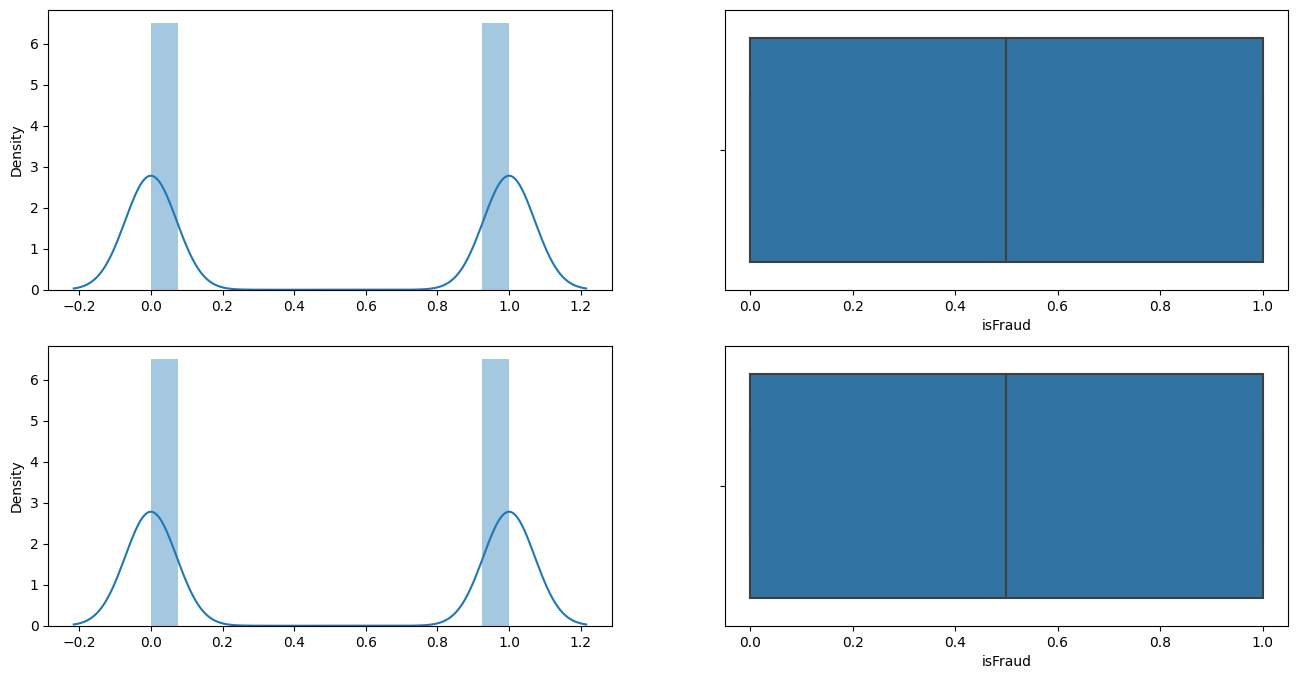

In [27]:
df2 = df1.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df2[col].quantile(0.25)
    percentile75 = df2[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df2[col] = np.where(df2[col]>upper_limit, upper_limit, np.where(df2[col]<lower_limit,lower_limit,df2[col]))
    return df2[df2[col] > upper_limit]


def create_comparison_plot(data,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(x = data[column])

    plt.subplot(2,2,2)
    sns.boxplot(x = data[column])

    plt.subplot(2,2,3)
    sns.distplot(x = df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(x = df1[column])

    plt.show()

for features in numerical_df.columns:
    remove_outliers_IQR(features)
    create_comparison_plot(df1,df2,features)



### Creating Train-Test data and running the model on Random Forest classifier

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Create an OrdinalEncoder instance
encoder = OrdinalEncoder()

# Fit and transform the encoder on the categorical columns of X
X_categorical = X[categorical_features]
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Replace the original categorical columns in X with the encoded values
X_encoded = X.copy()
X_encoded[categorical_features] = X_categorical_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.33, random_state=42)

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestClassifier(n_estimators=100,
                                                random_state=123))

hyperparameters = {'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
                   'randomforestclassifier__max_depth': [5, 3, 1]}

clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(f"Rsquare Score in Percentage: {r2_score(y_test, pred)*100:.2f}%")
print(f"Mean Squared Error in Percentage: {mean_squared_error(y_test, pred)*100:.2f}%")
print(f"Mean Absolute Error in Percentage: {mean_absolute_error(y_test, pred)*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Rsquare Score in Percentage: 82.22%
Mean Squared Error in Percentage: 4.45%
Mean Absolute Error in Percentage: 4.45%


### Testing Over Different Models

>>>>>>>>>>>>>>>>>>>>Results for Classifier RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.968
accuracy score of this classification is 0.9787862018077845
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction


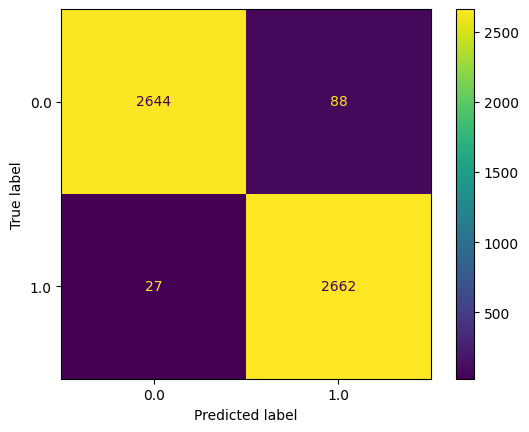

>>>>>>>>>>>>>>>>>>>>Results for Classifier DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.9723858615611193
accuracy score of this classification is 0.9773104593248478
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction


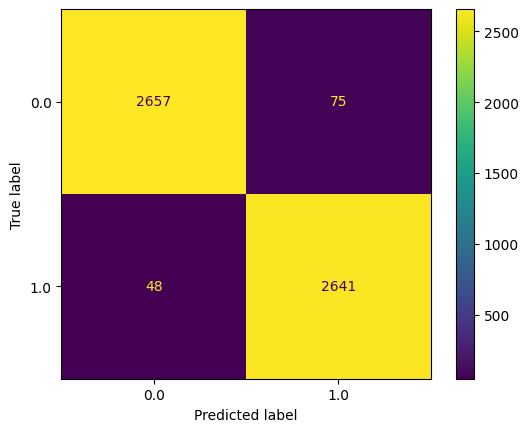

>>>>>>>>>>>>>>>>>>>>Results for Classifier SVC() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.9364937388193202
accuracy score of this classification is 0.864047223759454
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction


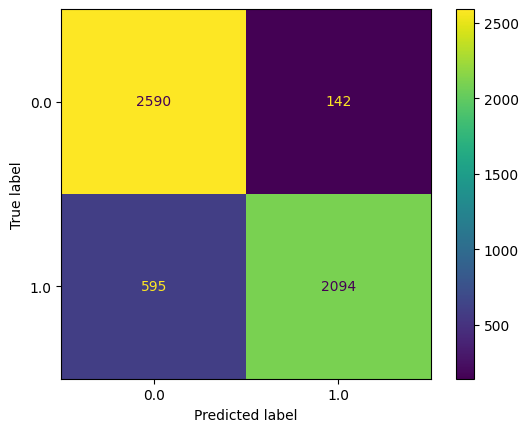

>>>>>>>>>>>>>>>>>>>>Results for Classifier LogisticRegression() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.8146687697160884
accuracy score of this classification is 0.7983766832687696
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction


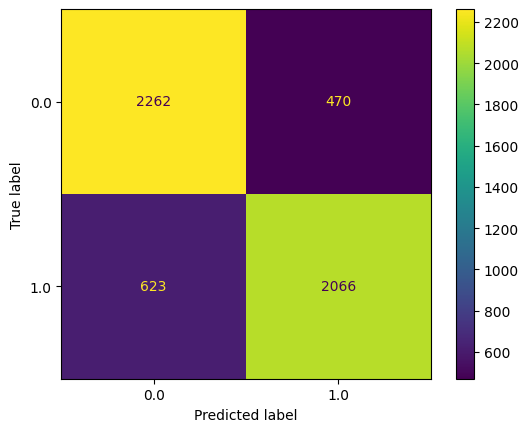

>>>>>>>>>>>>>>>>>>>>Results for Classifier GaussianNB() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.8481012658227848
accuracy score of this classification is 0.7677550267478325
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction


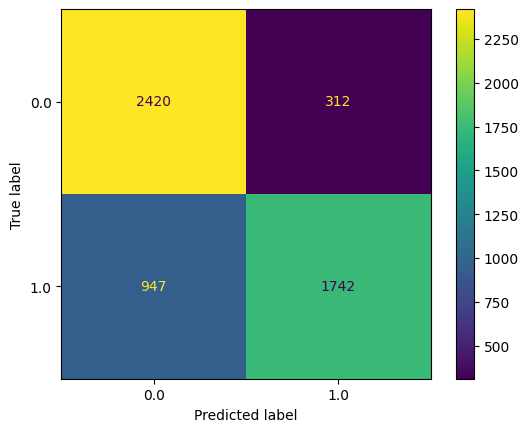

>>>>>>>>>>>>>>>>>>>>Results for Classifier KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.948394081559004
accuracy score of this classification is 0.9623685666851135
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction


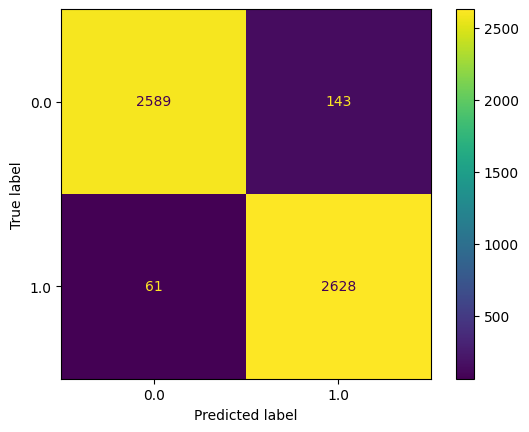

>>>>>>>>>>>>>>>>>>>>Results for Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.9791590493601463
accuracy score of this classification is 0.9874561888950378
0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transactio

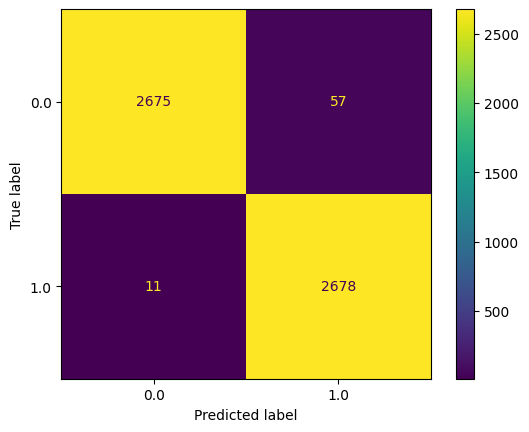

>>>>>>>>>>>>>>>>>>>>Results for Classifier XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...) <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.9389044943820225
accuracy score of this classification is 0.9651355838406198
0 is Non-Fraudulent Tra

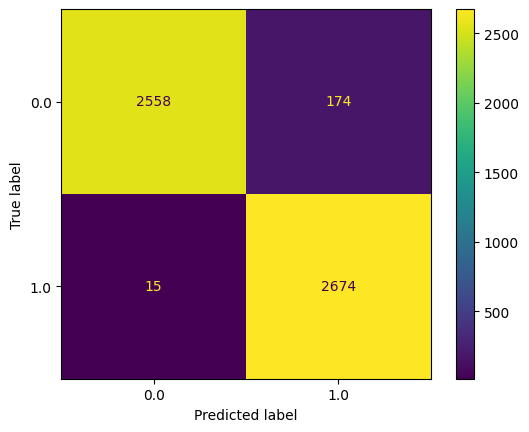

In [41]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
RFestimator = RandomForestRegressor()
RFClassifier = RandomForestClassifier()
DTClassifier = DecisionTreeClassifier()
Support_Vec_Classifier = SVC()
Logistic_Regressor = LogisticRegression()
Gaussian_Naive_Bayes = GaussianNB()
K_Neighbors_Classifier = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgbRF = xgb.XGBRFClassifier()

def Classification_func(func):
    print(f"{'>>'*10}Results for Classifier {str(func)} {'<<'*10}")
    func.fit(X_train, y_train)
    pred = func.predict(X_test)
    print(f"Precision score of this classification is {precision_score(y_test, pred)}")
    print(f"accuracy score of this classification is {accuracy_score(y_test, pred)}")
    print("0 is Non-Fraudulent Transacrtion and 1 is Fraudulent Transaction")
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred, labels = func.classes_), display_labels = func.classes_)
    disp.plot()
    plt.show()

Classification_func(RFClassifier)
Classification_func(DTClassifier)
Classification_func(Support_Vec_Classifier)
Classification_func(Logistic_Regressor)
Classification_func(Gaussian_Naive_Bayes)
Classification_func(K_Neighbors_Classifier)
Classification_func(xgb_model)
Classification_func(xgbRF)

## In Conclusion XGBoost Classifier predicts the fraudulant Transactions at best with the Following scores
- Precision score of this classification is 0.9791590493601463
- Accuracy score of this classification is 0.9874561888950378
- Confusion Matrix is as follows:
  - 0 represents Non-Fraudulent Transacrtion and 1 represents Fraudulent Transaction

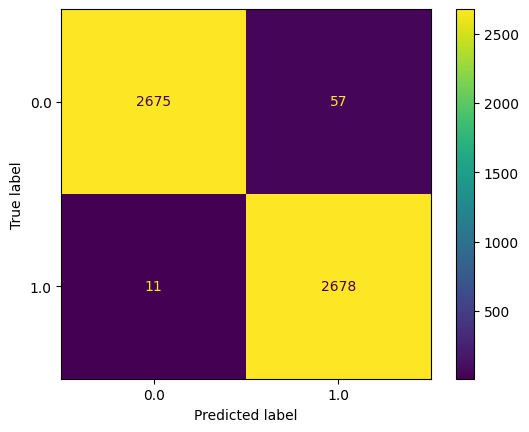